In [3]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Quick look
print(df.shape)
print(df['y'].value_counts(normalize=True))
df.head()

(41188, 21)
no     0.887346
yes    0.112654
Name: y, dtype: float64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Using balance column: NOT FOUND – check your file!
Cold    34742
Warm      740
Hot         0
Name: lead_tier, dtype: int64

Top 10 Hot leads:
       age            job poutcome  lead_score lead_tier
24799   31   entrepreneur  success          80      Warm
24850   51         admin.  success          80      Warm
25454   49     management  success          80      Warm
25504   35  self-employed  success          80      Warm
26972   36     management  success          80      Warm
27840   30         admin.  success          80      Warm
29306   35         admin.  success          80      Warm
30149   53         admin.  success          80      Warm
30184   31         admin.  success          80      Warm
30194   48   entrepreneur  success          80      Warm

Saved → Bank_41k_Scored_RuleBased.csv


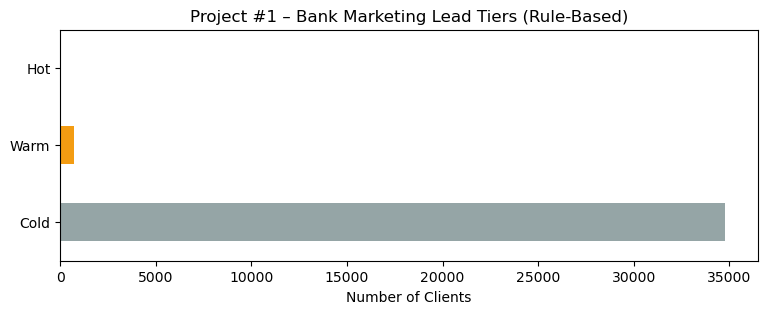

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Auto-detect correct column names
balance_col = 'balance' if 'balance' in df.columns else 'cons.price.idx'  # fallback (rare)
print("Using balance column:", 'balance' if 'balance' in df.columns else "NOT FOUND – check your file!")

# If you really don't have 'balance', just comment out that line below
score = 0

# Job title
score += df['job'].isin(['admin.','management','entrepreneur','self-employed']).astype(int) * 25

# Age sweet spot
score += df['age'].between(30, 55).astype(int) * 15

# High balance (safe version – skips if column missing)
if 'balance' in df.columns:
    score += (df['balance'] > 5000).astype(int) * 30
else:
    print("Warning: 'balance' column not found – skipping that rule")

# Previous success
score += (df['poutcome'] == 'success').astype(int) * 40

# Housing loan penalty
score -= (df['housing'] == 'yes').astype(int) * 10

# Final
df['lead_score'] = score.clip(0, 150)
df['lead_tier'] = pd.cut(df['lead_score'], bins=[0,50,80,200], labels=['Cold','Warm','Hot'])

print(df['lead_tier'].value_counts().sort_index())
print("\nTop 10 Hot leads:")
print(df.nlargest(10,'lead_score')[['age','job','poutcome','lead_score','lead_tier']])

df.to_csv('Bank_41k_Scored_RuleBased.csv', index=False)
print("\nSaved → Bank_41k_Scored_RuleBased.csv")

df['lead_tier'].value_counts().sort_index().plot(kind='barh', 
                                                 color=['#95a5a6','#f39c12','#e74c3c'], figsize=(9,3))
plt.title('Project #1 – Bank Marketing Lead Tiers (Rule-Based)')
plt.xlabel('Number of Clients')
plt.show()